# FIGHTERS ANALYSIS - ROAD MAP

- PREPROCESS THE DATA (NORMALIZE AND STANDARDIZE THE COLUMNS).
- GENERAL ANALYSIS OF THE PYHISICAL ATTRIBUTES OF THE FIGHTERS.
- DEEP ANALYSIS OF THE RELATIONSHIP BETWEEN THE FEATURES OF THE FIGHTERS.
- FINAL CONCLUSIONS.

## IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING THE DATA

In [2]:
def import_data(path):
    return pd.read_csv(path)

fighters = import_data('data/raw_fighters_data.csv')

## TRANSFORMING THE  COLUMN DATE OF BIRTH TO DATETIME

In [3]:
fighters['DOB'] = pd.to_datetime(fighters['DOB'])

## NORMALIZING THE COLUMNS WITH THE PERCENTAGE SYMBOL

In [4]:
def percentage_to_float(x):
    return float(x.strip('%')) / 100

percentage_columns = ['Str_Def', 'Str_Acc', 'TD_Acc','TD_Def']

for column in percentage_columns:
    fighters[column] = fighters[column].apply(percentage_to_float)

## NORMALIZING THE REACH AND WEIGHT COLUMNS

In [5]:
def normalize_reach_weight(dataframe, reach, weight):

    dataframe[reach] = dataframe[reach].str.strip('"')
    dataframe[reach] = dataframe[reach].astype('float64')
    dataframe[reach] = dataframe[reach] * 2.54

    dataframe[weight] = dataframe[weight].str.strip('lbs.')
    dataframe[weight] = dataframe[weight].astype('float64')

    return dataframe

fighters = normalize_reach_weight(fighters, 'Reach', 'Weight') 

## TRANSFORMING THE HEIGHT COLUMN IN CENTIMETERS

In [6]:
def get_feets(height):

    if pd.isnull(height):
        return np.NaN

    height = str(height)
    start = height.find('') + len('')
    end = height.find("' ")
    feets  = height[start:end]

    return int(feets)

def get_inches(height):

    if pd.isnull(height):
        return np.NaN

    height = str(height)
    start = height.find("' ") + len("' ")
    end = height.find('"')
    inches  = height[start:end]

    return int(inches)

fighters['Feets'] = fighters['Height'].apply(get_feets)
fighters['Inches'] = fighters['Height'].apply(get_inches)
fighters['Height'] = (fighters['Feets'] * 30.48) + (fighters['Inches'] * 2.54)

fighters = fighters.drop(columns = ['Feets', 'Inches'])

## VISUALIZING THE DISTRIBUTION OF THE HEIGHT, WEIGHT AND REACH COLUMNS

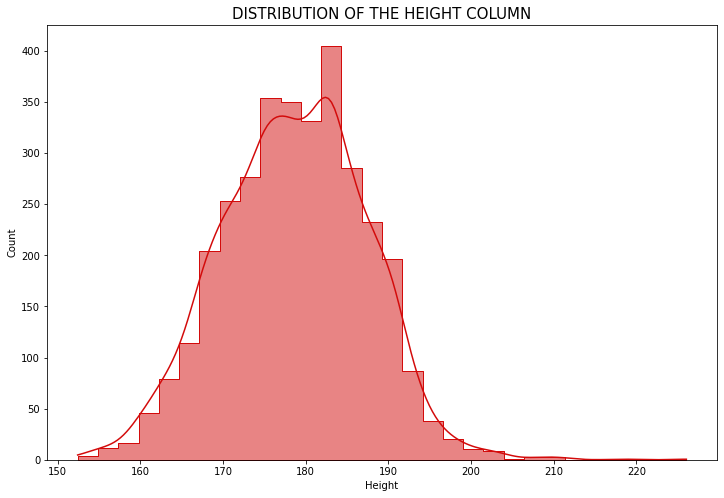

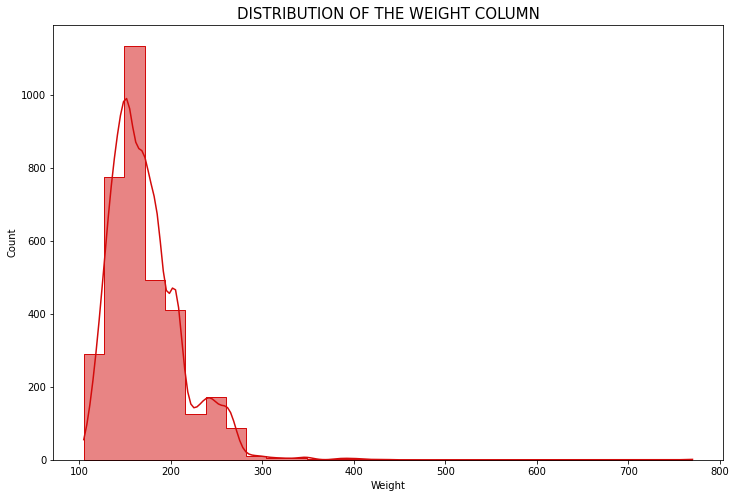

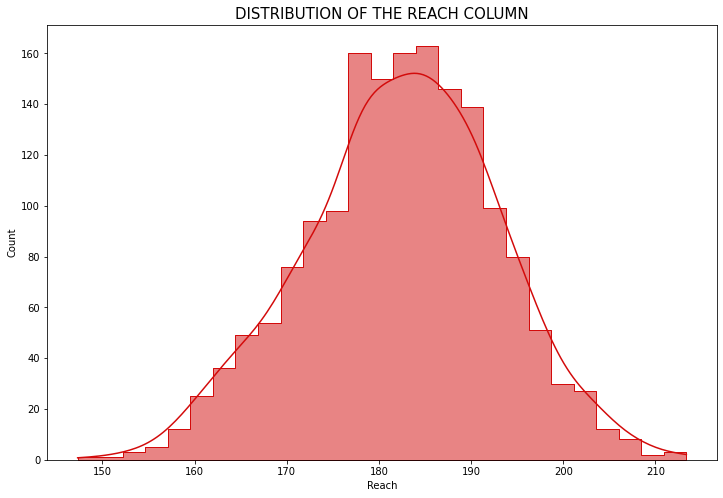

In [7]:
pyhisical_columns = ['Height', 'Weight', 'Reach']

for column in pyhisical_columns:

    if column == 'Reach':
        bins = 27

    else:
        bins = 30
        
    fig = plt.figure(figsize = (12, 8))
    sns.histplot(x = column, data = fighters, bins = bins, color = '#D30B0B', kde = True, element = "step")
    plt.title(f'DISTRIBUTION OF THE {column.upper()} COLUMN', fontsize = 15)
    plt.show()

## VISUALIZING THE STANCE COLUMN

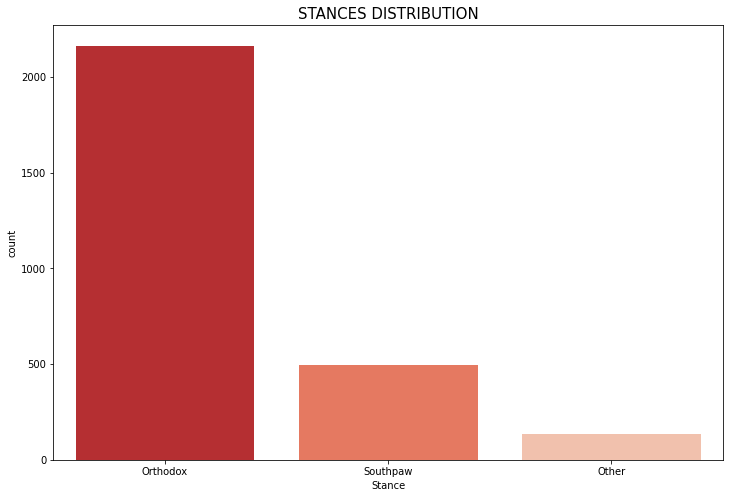

In [8]:
fighters['Stance'] = fighters['Stance'].replace({'Switch': 'Other',
                                                 'Open Stance': 'Other', 
                                                 'Sideways': 'Other'})

fig = plt.figure(figsize = (12, 8))
sns.countplot(x = 'Stance', data = fighters, palette = 'Reds_r', order = ['Orthodox', 'Southpaw', 'Other'])
plt.title('STANCES DISTRIBUTION', fontsize = 15)
plt.show()

## VISUALIZING THE RELATION BETWEEN THE STRIKING WITH THE REACH

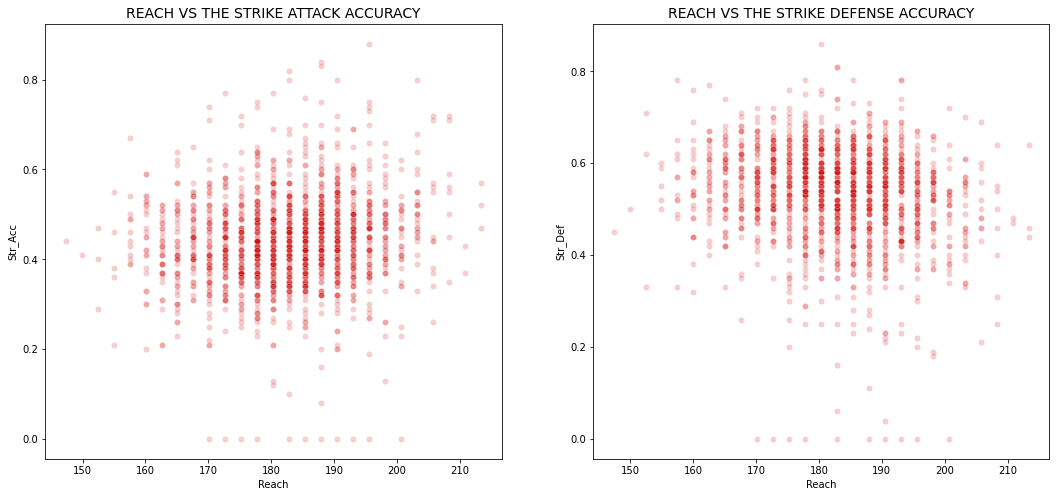

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8))
sns.scatterplot(ax = axes[0], x = 'Reach', y = 'Str_Acc', data = fighters, color = '#D30B0B', alpha = 0.2)
sns.scatterplot(ax = axes[1], x = 'Reach', y = 'Str_Def', data = fighters, color = '#D30B0B', alpha = 0.2)
axes[0].set_title('REACH VS THE STRIKE ATTACK ACCURACY', fontsize = 14)
axes[1].set_title('REACH VS THE STRIKE DEFENSE ACCURACY', fontsize = 14)
plt.show()

## VISUALIZING THE RELATION BETWEEN THE STRIKING ACCURACIES AND THE STANCE

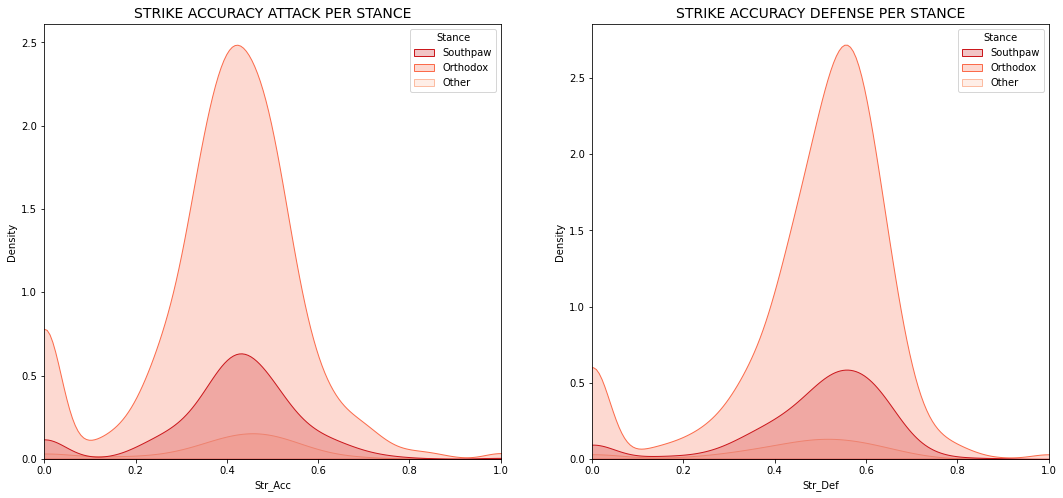

In [10]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8))
sns.kdeplot(ax = axes[0], x = 'Str_Acc', data = fighters, palette = 'Reds_r', hue = 'Stance', fill = True)
sns.kdeplot(ax = axes[1], x = 'Str_Def', data = fighters, palette = 'Reds_r', hue = 'Stance', fill = True)
axes[0].set_title('STRIKE ACCURACY ATTACK PER STANCE', fontsize = 14)
axes[1].set_title('STRIKE ACCURACY DEFENSE PER STANCE', fontsize = 14)
axes[0].set_xlim(0, 1)
axes[1].set_xlim(0, 1)
plt.show()

## VSUALIZING THE RELATION BETWEEN THE REACH AND THE HEIGHT OF THE FIGHTERS

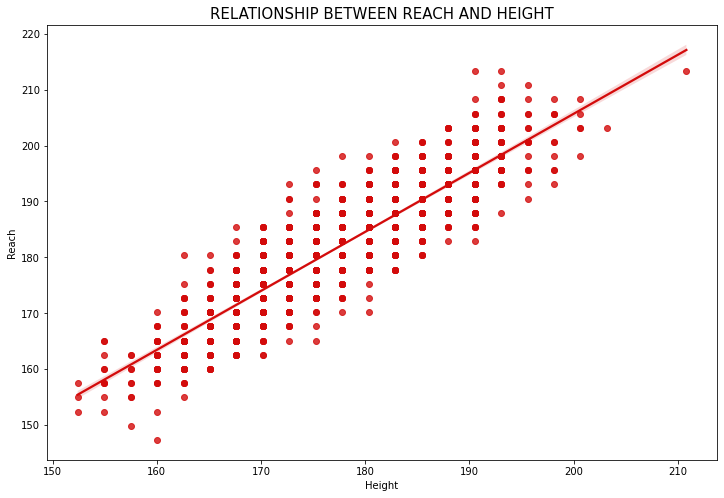

In [11]:
fig = plt.figure(figsize = (12, 8))
sns.regplot(x = fighters['Height'], y = fighters['Reach'], color = '#D30B0B')
plt.title(f'RELATIONSHIP BETWEEN REACH AND HEIGHT', fontsize = 15)
plt.show()

## RELATION BETWEEN THE HEIGHT AND THE TAKEDOWNS

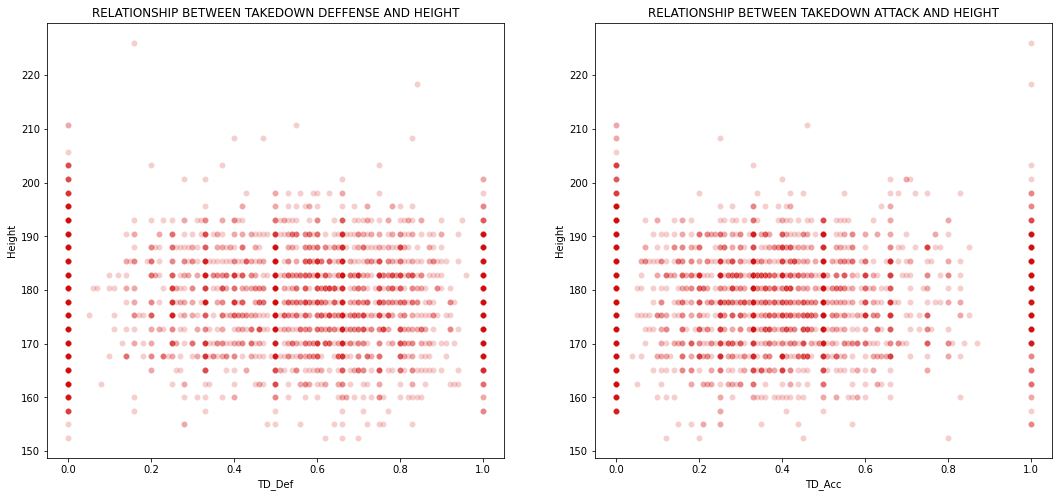

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8))
sns.scatterplot(ax = axes[0], x = 'TD_Def', y = fighters['Height'], data = fighters, color = '#D30B0B', alpha = 0.2)
sns.scatterplot(ax = axes[1], x = 'TD_Acc', y = fighters['Height'], data = fighters, color = '#D30B0B', alpha = 0.2)
axes[0].set_title(f'RELATIONSHIP BETWEEN TAKEDOWN DEFFENSE AND HEIGHT', fontsize = 12)
axes[1].set_title(f'RELATIONSHIP BETWEEN TAKEDOWN ATTACK AND HEIGHT', fontsize = 12)
plt.show()

## VISUALIZING THE RELATION BETWEEN THE WEIGHT AND THE TAKEDOWNS

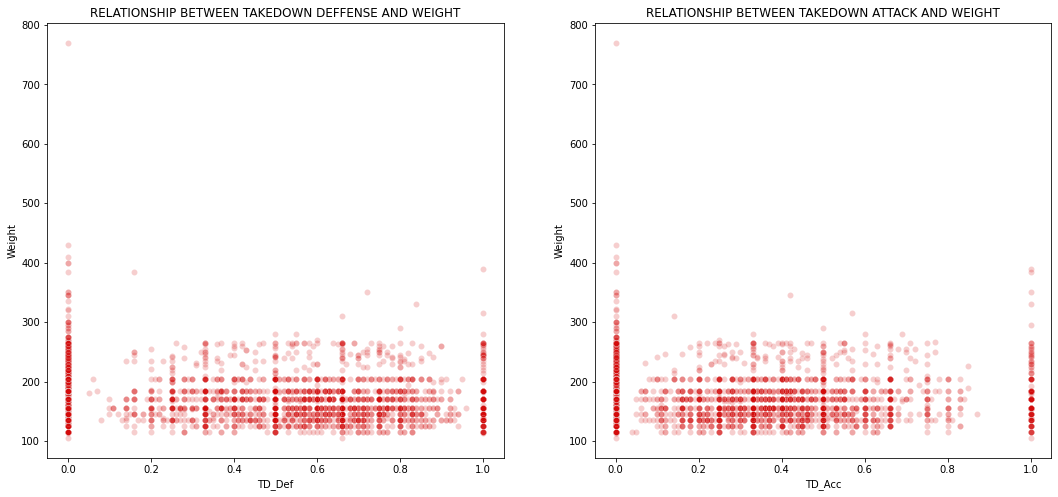

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8))
sns.scatterplot(ax = axes[0], x = 'TD_Def', y = fighters['Weight'], data = fighters, color = '#D30B0B', alpha = 0.2)
sns.scatterplot(ax = axes[1], x = 'TD_Acc', y = fighters['Weight'], data = fighters, color = '#D30B0B', alpha = 0.2)
axes[0].set_title(f'RELATIONSHIP BETWEEN TAKEDOWN DEFFENSE AND WEIGHT', fontsize = 12)
axes[1].set_title(f'RELATIONSHIP BETWEEN TAKEDOWN ATTACK AND WEIGHT', fontsize = 12)
plt.show()

## CONCLUSIONS

1. HEIGHT DISTRIBUTION: MOST OF THE FIGHTERS ARE BETWEEN 175 AND 185 CENTIMETRES TALL. ONLY A FEW ARE TALLER THAN 2 METRES.

2. WEIGHT DISTRIBUTION: MOST OF THE FIGHTERS HAVE A WEIGHT CLOSE TO 150 POUNDS. HOWEVER, WE CAN OBSERVE SOME OUTLIERS WEIGHING OVER 700 POUNDS. IN SPITE OF THIS, THE NUMBER OF OUTLIERS IS VERY SMALL AND INSIGNIFICANT.

3. REACH DISTRIBUTION: AS FOR THE DISTRIBUTION OF THE REACH OF THE FIGHTERS, WE CAN OBSERVE THAT MOST OF THEM HAVE A REACH OF MORE THAN 180 CENTIMETERS. THE DISTRIBUTION THAT FOLLOWS THIS COLUMN IS VERY SIMILAR TO A NORMAL DISTRIBUTION, IN WHICH NO OUTLIER STANDS OUT.
THEM IN A CATEGORY CALLED 'OTHER'.

4. STANCE DISTRIBUTION: THE VAST MAJORITY OF FIGHTERS HAVE A STANCE REFERRED TO AS ORTHODOX (77%).  HOWEVER, BETWEEN THE SWITCH, OPEN STANCE AND SIDEWAYS CATEGORIES, THE TOTAL NUMBER OF FIGHTERS WITH THIS STANCE IS SO SMALL THAT WE HAVE DECIDED TO GROUP THEM IN A CATEGORY CALLED 'OTHER'.

5. WE HAVE ANALYSED A LARGE NUMBER OF POSSIBLE RELATIONSHIPS BETWEEN VARIABLES IN TERMS OF WRESTLER ATTRIBUTES, BUT THE ONLY TWO NON-REDUNDANT VARIABLES THAT SHOWED A CLEAR CORRELATION WERE HEIGHT AND REACH.
